In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=np.array(data)
m, n=data.shape
np.random.shuffle(data)
data_dev=data[0:1000].T
Y_dev = data_dev[0]

X_dev=data_dev[1:n]

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]

In [6]:
Y_train

array([9, 9, 3, ..., 4, 3, 2])

In [7]:
X_train[0].shape

(41000,)

In [11]:
def init_params():
    W1 = np.random.randn(64, 784) * 0.01
    b1 = np.zeros((64, 1))
    W2 = np.random.randn(32, 64) * 0.01
    b2 = np.zeros((32, 1))
    W3 = np.random.randn(10, 32) * 0.01
    b3 = np.zeros((10, 1))
    return W1, b1, W2, b2, W3, b3

def SoftMax(Z):
     exp = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Subtract max for stability
     return exp / np.sum(exp, axis=0, keepdims=True)


def relu(Z):
    return np.maximum(0,Z)
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = relu(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = SoftMax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y 
    
def back_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ3 = A3 - one_hot_Y
    dW3 = 1/m * dZ3.dot(A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)
    
    dZ2 = W3.T.dot(dZ3) * deriv_ReLU(Z2)
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1-(alpha * dW1)
    b1 = b1-(alpha * db1)
    W2 = W2-(alpha * dW2)
    b2 = b2-(alpha * db2)
    W3 = W3-(alpha * dW3)
    b3 = b3- (alpha * db3)
    return W1, b1, W2, b2, W3, b3

In [12]:
def get_prediction(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = back_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3,
                                               dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            predictions = get_prediction(A3)
            acc = get_accuracy(predictions, Y)
            print("Iteration", i, "Accuracy:", acc)
    return W1, b1, W2, b2, W3, b3



In [24]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 100, 0.019)

[7 7 7 ... 7 7 7] [9 9 3 ... 4 3 2]
Iteration 0 Accuracy: 0.09436585365853659
[9 9 0 ... 4 3 2] [9 9 3 ... 4 3 2]
Iteration 10 Accuracy: 0.5562926829268293
[1 1 0 ... 1 3 2] [9 9 3 ... 4 3 2]
Iteration 20 Accuracy: 0.30753658536585365
[7 7 3 ... 4 3 4] [9 9 3 ... 4 3 2]
Iteration 30 Accuracy: 0.43934146341463415
[4 4 3 ... 4 3 2] [9 9 3 ... 4 3 2]
Iteration 40 Accuracy: 0.7011219512195122
[9 9 3 ... 4 3 2] [9 9 3 ... 4 3 2]
Iteration 50 Accuracy: 0.8219024390243902
[9 9 5 ... 4 3 2] [9 9 3 ... 4 3 2]
Iteration 60 Accuracy: 0.8186097560975609
[9 9 3 ... 4 3 2] [9 9 3 ... 4 3 2]
Iteration 70 Accuracy: 0.8851463414634146
[9 9 3 ... 4 3 2] [9 9 3 ... 4 3 2]
Iteration 80 Accuracy: 0.8894634146341464
[9 9 3 ... 4 3 2] [9 9 3 ... 4 3 2]
Iteration 90 Accuracy: 0.9065121951219512


In [25]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_prediction(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


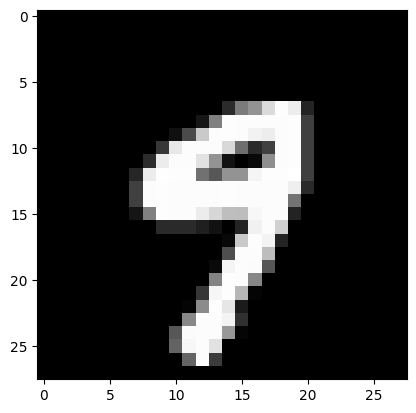

Prediction:  [9]
Label:  9


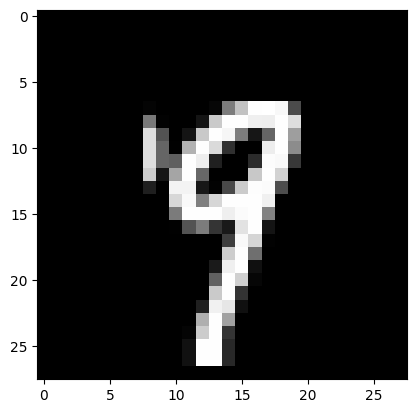

Prediction:  [3]
Label:  3


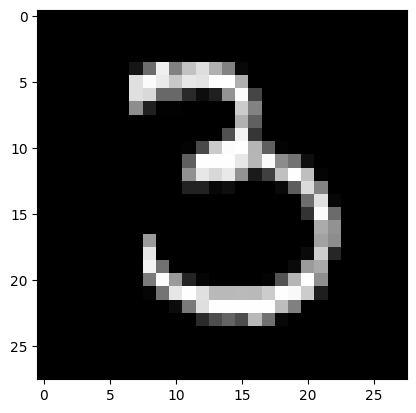

Prediction:  [0]
Label:  0


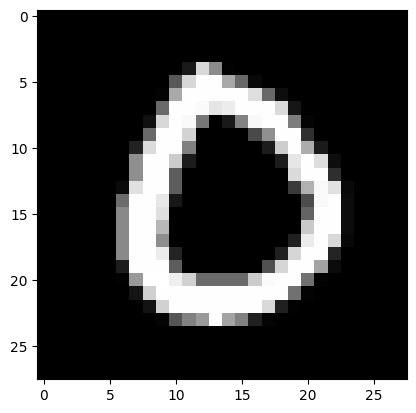

In [26]:
test_prediction(0,W1,b1,W2,b2,W3,b3)
test_prediction(1,W1,b1,W2,b2,W3,b3)
test_prediction(2,W1,b1,W2,b2,W3,b3)
test_prediction(3,W1,b1,W2,b2,W3,b3)

In [27]:
dev_predictions = make_predictions(X_dev,W1,b1,W2,b2,W3,b3)
get_accuracy(dev_predictions,Y_dev)

[8 7 2 6 3 3 5 1 1 8 6 3 7 5 3 2 7 0 6 3 6 4 8 8 7 3 4 8 4 4 6 7 5 7 9 5 8
 5 1 6 3 9 5 5 7 4 6 2 6 6 4 8 6 2 4 8 7 0 7 2 5 7 9 7 5 0 1 3 8 5 4 5 0 2
 4 5 9 1 1 1 8 7 4 6 5 0 0 3 7 4 2 9 5 6 7 0 3 6 5 3 9 4 0 6 4 2 7 9 7 5 1
 0 6 6 9 6 6 6 3 8 7 5 0 9 3 1 2 6 9 7 4 5 6 4 7 2 8 4 1 7 7 3 4 6 8 4 8 7
 3 7 5 5 5 2 7 0 7 9 5 2 0 1 3 0 5 5 2 5 5 6 7 5 5 7 1 9 3 9 5 8 2 7 3 0 9
 6 3 8 5 2 2 4 6 7 1 6 4 4 2 7 9 6 4 1 6 1 6 6 0 6 0 1 6 1 2 5 0 9 7 7 8 5
 9 7 3 0 9 0 1 2 3 4 2 8 5 1 7 6 8 9 9 9 4 6 9 2 3 9 3 9 5 0 5 2 4 3 7 7 7
 7 3 0 3 0 9 9 1 7 8 9 2 7 3 0 5 6 5 1 2 2 9 3 2 9 6 7 1 8 8 9 3 4 6 5 7 4
 3 2 8 0 9 3 5 6 5 9 0 6 8 7 4 5 4 6 0 6 5 9 5 6 7 6 8 7 2 5 0 7 9 5 7 0 4
 9 2 8 9 6 6 4 8 1 0 8 7 3 8 1 0 4 4 6 8 6 2 6 6 7 0 7 0 4 3 4 0 5 8 7 5 6
 9 7 4 0 0 9 2 9 6 8 3 5 8 1 3 1 0 7 0 7 4 0 9 4 4 9 6 1 0 2 5 2 2 4 8 8 1
 4 3 5 7 9 8 6 8 1 7 9 2 2 7 8 3 6 2 1 0 8 4 0 9 4 5 3 5 3 8 7 7 5 0 3 0 6
 3 0 4 9 3 2 3 6 4 7 1 4 7 7 2 5 8 8 3 2 2 8 4 8 2 7 5 2 7 5 7 7 6 9 3 0 0
 2 6 3 8 2 2 1 6 6 6 0 2 

0.908